In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics ='accuracy')



In [3]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 7s 6ms/step - loss: 0.6958 - accuracy: 0.0014 - val_loss: 0.6957 - val_accuracy: 0.0015
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6955 - accuracy: 0.0014 - val_loss: 0.6954 - val_accuracy: 0.0014
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6953 - accuracy: 0.0014 - val_loss: 0.6952 - val_accuracy: 0.0015
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.0014 - val_loss: 0.6950 - val_accuracy: 0.0018
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.0014 - val_loss: 0.6948 - val_accuracy: 0.0018


1. Add one more hidden layer to autoencoder

In [4]:
# This is the size of our encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded2)

# This is our decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics ='accuracy')

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 3s 6ms/step - loss: 0.6942 - accuracy: 0.0016 - val_loss: 0.6941 - val_accuracy: 0.0025
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6940 - accuracy: 0.0015 - val_loss: 0.6939 - val_accuracy: 0.0025
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6938 - accuracy: 0.0015 - val_loss: 0.6937 - val_accuracy: 0.0023
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 0.0015 - val_loss: 0.6936 - val_accuracy: 0.0023
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.0015 - val_loss: 0.6934 - val_accuracy: 0.0022


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib

313/313 [==============================] - 1s 2ms/step


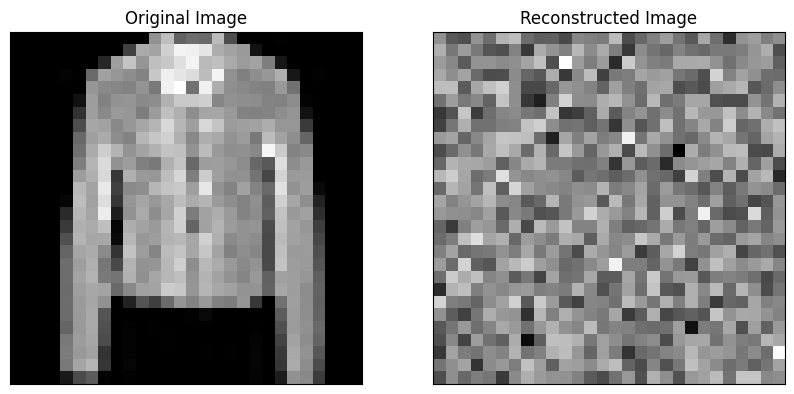

In [6]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

In [7]:

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics ='accuracy')



3.denoisening autoencoder

In [8]:

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.6974 - accuracy: 0.0012 - val_loss: 0.6974 - val_accuracy: 0.0013
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6972 - accuracy: 0.0012 - val_loss: 0.6971 - val_accuracy: 0.0014
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6970 - accuracy: 0.0012 - val_loss: 0.6969 - val_accuracy: 0.0014
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6967 - accuracy: 0.0012 - val_loss: 0.6967 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6965 - accuracy: 0.0013 - val_loss: 0.6965 - val_accuracy: 0.0015
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6963 - accuracy: 0.0013 - val_loss: 0.6963 - val_accuracy: 0.0015
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6961 - accuracy: 0.0013 - val_loss: 0.6960 - val_accuracy: 0.0015
Epoch 

313/313 [==============================] - 1s 2ms/step


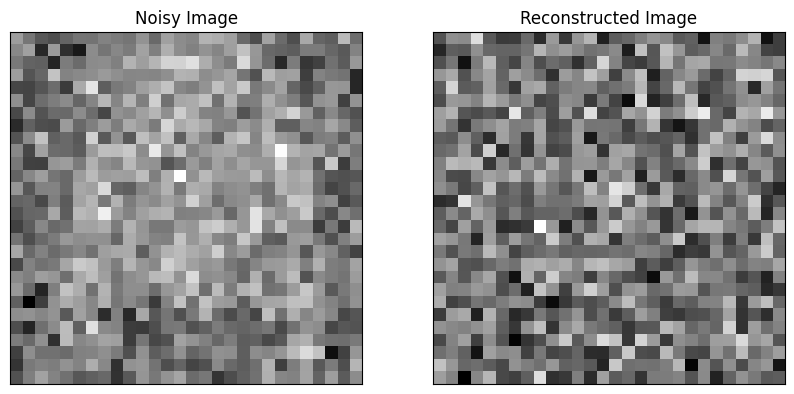

In [9]:

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

In [10]:

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6953 - accuracy: 0.0013 - val_loss: 0.6953 - val_accuracy: 0.0015
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6951 - accuracy: 0.0013 - val_loss: 0.6951 - val_accuracy: 0.0015
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6950 - accuracy: 0.0013 - val_loss: 0.6949 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6948 - accuracy: 0.0013 - val_loss: 0.6948 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.0013 - val_loss: 0.6946 - val_accuracy: 0.0015
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6945 - accuracy: 0.0013 - val_loss: 0.6944 - val_accuracy: 0.0014
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6943 - accuracy: 0.0013 - val_loss: 0.6943 - val_accuracy: 0.0014
Epoch 

4. plot loss and accuracy using the history object

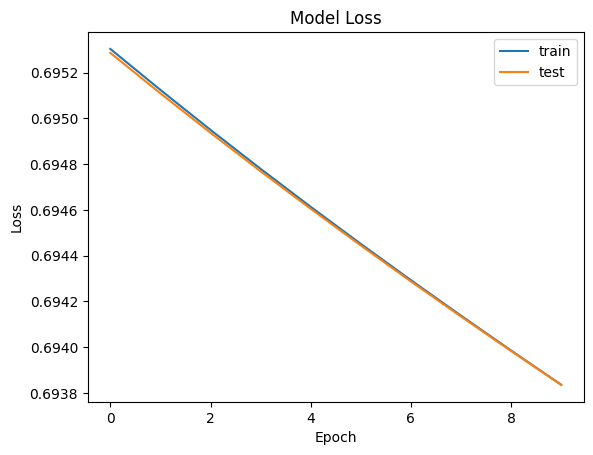

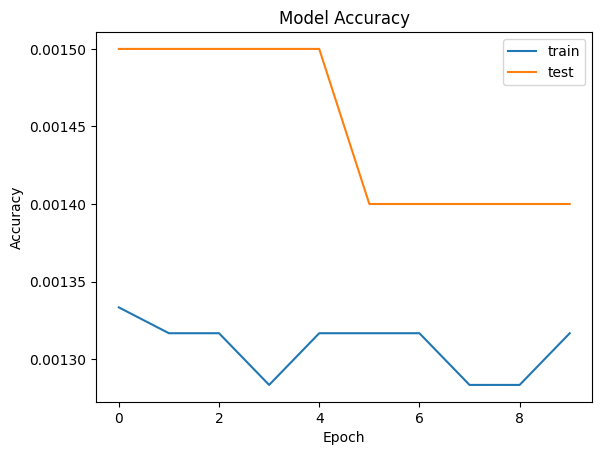

In [11]:

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()